In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('data/Kid/o.jpg')[:, :, 0]

def scale_shift_rotaion(img, s=1, x=0, y=0, theta=0):
    """x, y >= 0"""
    h, w = img.shape
    M = cv2.getRotationMatrix2D((0, 0), theta, s)
    M[:, 2] += [x, y]
    return cv2.warpAffine(img, M, (w + x, h + y) )

# Data Augmentation

In [40]:
right_shift = scale_shift_rotaion(img, x=150)
half_scale = scale_shift_rotaion(img, s=0.5)
white_noise = half_scale.copy()
white_noise[ half_scale == 0 ] = np.random.randint(0, 255, white_noise.shape)[ half_scale == 0 ]
reflection = img[:, ::-1]
rotaton = scale_shift_rotaion(img, s=0.75, y=120, theta=30)
repeat = scale_shift_rotaion( np.hstack([img, img]), s=0.5)
repeat = repeat[:repeat.shape[0]//2, :repeat.shape[1]//2]
repeat2 = np.vstack([repeat, repeat])[::-1]

imgs = [img, right_shift, half_scale, white_noise, reflection, rotaton, repeat, repeat2]
texts = ['Origin', 'Right shift', 'Scale & Padding', 'Within white noise', 'Reflect', 'Rotate & Scale', 'Double horizontal', 'Double & Reflect']

In [13]:
from utils.array import create_latents, transformation, normalize

N_DIRECTIONS = 10

max_period = max(max_height, max_width)

cos_, sin_ = create_latents(N_DIRECTIONS, max_period, max_height, max_width)

features = []
normalized = []
for image in imgs:
    features.append( transformation(image, cos_, sin_, standardize=False) )
    normalized.append( normalize(features[-1]) )

# Feature matrix visualization

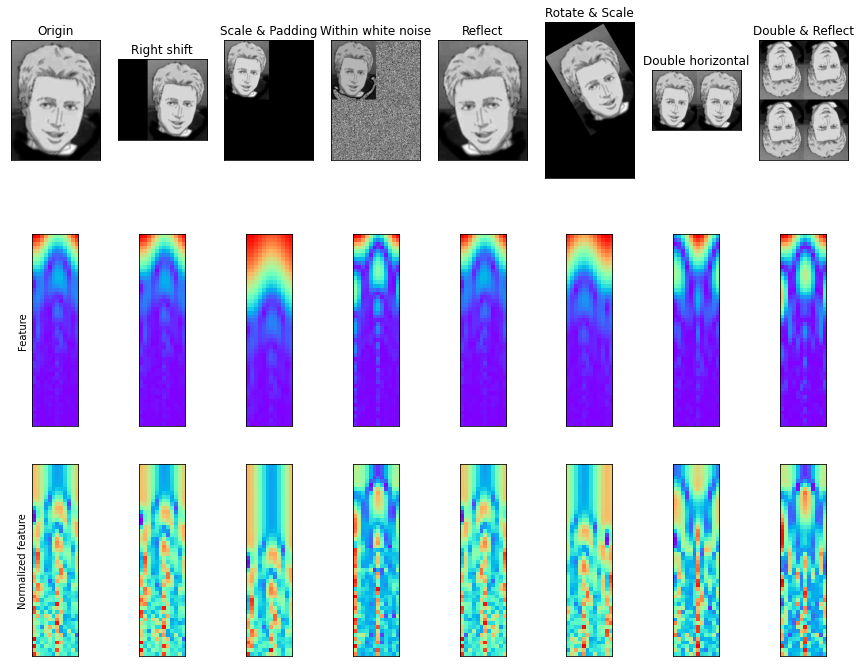

In [42]:
fig, axes = plt.subplots(3, len(imgs) )
fig.set_figwidth(15)
fig.set_figheight(12)
plt.setp(axes, xticks=[], yticks=[])


for i, (text, image, feat, norm) in enumerate(zip(texts, imgs, features, normalized)):
    axes[0, i].imshow(image, cmap='gray')
    axes[0, i].set_title(text)
    axes[1, i].imshow(feat[:50], cmap='rainbow')
    axes[2, i].imshow(norm[:50], cmap='rainbow')

axes[1, 0].set_ylabel('Feature')
axes[2, 0].set_ylabel('Normalized feature')
None